In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [6]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[0]

In [3]:
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
Date,,,
2021-03-10,955177.0,1617220,2122898
2021-03-09,823210.0,1909363,2378673
2021-03-08,1117939.0,2119867,2485430
2021-03-07,1277719.0,1844811,2156262
2021-03-06,991547.0,2198517,2543689
...,...,...,...
2020-08-27,NaN,721060,2561109
2020-08-26,NaN,540043,2188688
2020-08-25,NaN,523186,2015088


In [4]:
df['Difference in Travelers 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput'])
df['Difference in Travelers 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput'])
df['% Change 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput']).div(df['2020 Traveler Throughput'])
df['% Change 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput']).div(df['2019 Traveler Throughput'])

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput,Difference in Travelers 2021 vs 2020,Difference in Travelers 2020 vs 2019,% Change 2021 vs 2020,% Change 2020 vs 2019
Date,,,,,,,
2021-03-10,955177.0,1617220,2122898,-662043.0,-505678,-0.409371,-0.238202
2021-03-09,823210.0,1909363,2378673,-1086153.0,-469310,-0.568856,-0.197299
2021-03-08,1117939.0,2119867,2485430,-1001928.0,-365563,-0.472637,-0.147082
2021-03-07,1277719.0,1844811,2156262,-567092.0,-311451,-0.307398,-0.144440
2021-03-06,991547.0,2198517,2543689,-1206970.0,-345172,-0.548993,-0.135697
...,...,...,...,...,...,...,...
2020-08-27,NaN,721060,2561109,NaN,-1840049,NaN,-0.718458
2020-08-26,NaN,540043,2188688,NaN,-1648645,NaN,-0.753257
2020-08-25,NaN,523186,2015088,NaN,-1491902,NaN,-0.740366


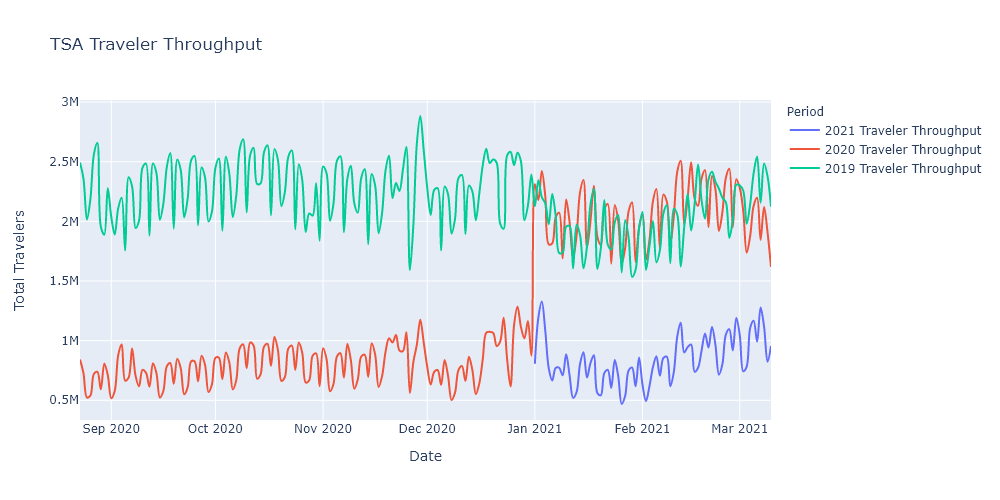

In [5]:
fig = px.line(df, y=['2021 Traveler Throughput',
                     '2020 Traveler Throughput',
                     '2019 Traveler Throughput'],
              line_shape='spline',
              title='TSA Traveler Throughput',
              labels={'value':'Total Travelers',
                      'variable':'Period'})

fig.show(renderer='png', height=500, width=1000)